# Modules python
Importer les modules pandas (comme `pd`) numpy (commme `np`)
matplotlib.pyplot (comme  `plt`), statsmodels.formula.api (comme `smf`)
et statsmodels.api (comme `sm`)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Régression multiple (modèle du cours)

## Importation des données
Importer les données d'ozone dans le DataFrame pandas `ozone`

In [2]:
ozone = pd.read_csv("data/ozone.txt", header=0, sep=";")

## Estimation du modèle du cours
Nous sommes intéressé par batir un modèle de prévision de l'ozone par 
une régression multiple. Ce régression expliquera
le maximum de la concentration en ozone du jour (variable `O3`) par 
- la température à midi notée `T12`
- la nébulosité à midi notée `Ne12`
- la vitesse du vent sur l'axe Est-Ouest notée `Vx`
Traditionnellement on introduit toujours la constante (le faire ici aussi).
Estimer le modèle par MCO et faire le résumé.

In [3]:
reg = smf.ols('O3~T12+Ne12+Vx', data=ozone).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.66e-11
Time:                        11:01:57   Log-Likelihood:                -200.50
No. Observations:                  50   AIC:                             409.0
Df Residuals:                      46   BIC:                             416.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.5473     13.607      6.214      0.000      57.158     111.936
T12            1.3150      0.497      2.644      0.011       0.314       2.316
Ne12          -4.8934      1.027     -4.765      0.000      -6.961      -2.826
Vx             0.4864      0.168      2.903      0.006       0.149       0.824
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.411
Skew:                          -0.050   Prob(JB):                        0.814
Kurtosis:                       2.567   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Résidus \$\varepsilon\$
Afficher le graphique des résidus (attribut `resid` du modèle estimé)
(avec \$\hat y\$ en abscisse et \$\varepsilon\$ en ordonnée).

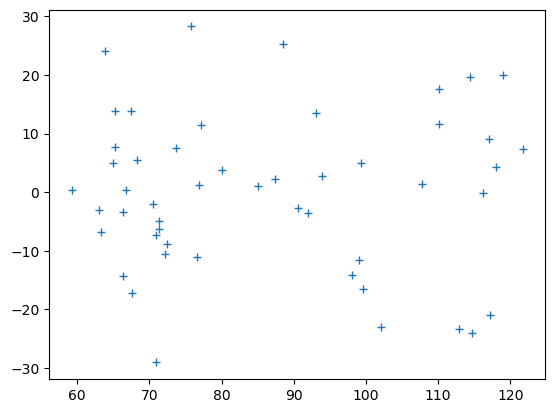

In [4]:
plt.plot(reg.predict(), reg.resid ,"+")

Aucune structuration des résidus visible. L'épaisseur (écart-type) des points semble 
un peu toujours la même mais ces résidus par construction n'ont pas la même variance, 
donc il est délicat de conclure sur l'hypothèse \$\mathrm{V}(\varepsilon_i)=\sigma^2\$.
De plus l'échelle des ordonnées dépend du problème, donc ces résidus sont peu 
praticables.

## Résidus \$\varepsilon\$
Afficher le graphique des résidus studentisés par validation croisée (avec \$\hat y\$ en abscisse et 
\$\varepsilon\$ en ordonnée). Pour cela utiliser la fonction/méthode `get_influence` 
qui renverra un objet (que l'on nommera `infl`) avec un attribut `resid_studentized_external`
contenant les résidus souhaités.

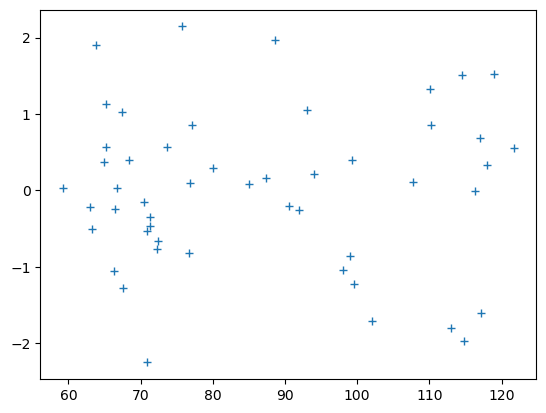

In [5]:
infl = reg.get_influence()
plt.plot(reg.predict(), infl.resid_studentized_external,"+")

Aucune structuration des résidus visible. L'épaisseur (écart-type) des points semble 
un peu toujours la même donc l'hypothèse \$\mathrm{V}(\varepsilon_i)=\sigma^2\$ semble
correcte. Aucun point en dehors de -2,2 donc pas d'individus aberrant.

## Points leviers
Représenter les \$h_{ii}\$ grâce à `plt.stem` en fonction du numéro de ligne

<StemContainer object of 3 artists>

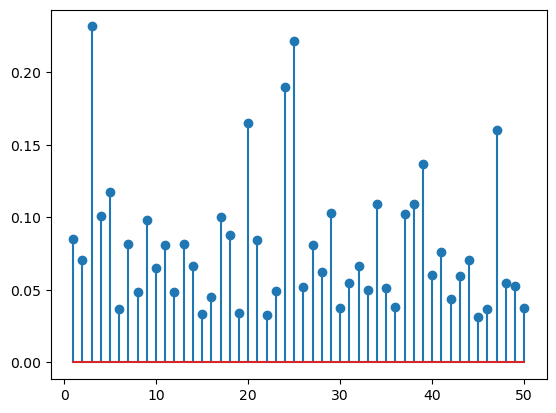

In [6]:
index=np.arange(1, ozone.shape[0]+1)
plt.stem(index, infl.hat_matrix_diag)

Aucun  \$h_{ii}\$ notablement plus grand 
que les autres donc le plan d'expérience est correct.

# R²
Nous sommes intéressé par batir un modèle de prévision de l'ozone par 
une régression multiple. Cependant nous ne savons pas trop a priori
quelles sont les variables utiles. Batissons plusieurs modèles.

## Estimation du modèle du cours
Ce régression expliquera
le maximum de la concentration en ozone du jour (variable `O3`) par 
- la température à midi notée `T12`
- la nébulosité à midi notée `Ne12`
- la vitesse du vent sur l'axe Est-Ouest notée `Vx`
Traditionnellement on introduit toujours la constante (le faire ici aussi).
Estimer le modèle par MCO et faire le résumé.

In [7]:
reg3 = smf.ols('O3~T12+Ne12+Vx', data=ozone).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.66e-11
Time:                        11:01:57   Log-Likelihood:                -200.50
No. Observations:                  50   AIC:                             409.0
Df Residuals:                      46   BIC:                             416.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.5473     13.607      6.214      0.000      57.158     111.936
T12            1.3150      0.497      2.644      0.011       0.314       2.316
Ne12          -4.8934      1.027     -4.765      0.000      -6.961      -2.826
Vx             0.4864      0.168      2.903      0.006       0.149       0.824
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.411
Skew:                          -0.050   Prob(JB):                        0.814
Kurtosis:                       2.567   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Estimation du modèle du cours
Ce régression expliquera
le maximum de la concentration en ozone du jour (variable `O3`) par 
- la température à six heures notée `T12`
- la température à midi notée `T15`
- la nébulosité à midi notée `Ne12`
- la vitesse du vent sur l'axe Est-Ouest notée `Vx`
- le maximum du jour d'avant/la veille `O3v`
Traditionnellement on introduit toujours la constante (le faire ici aussi).
Estimer le modèle par MCO et faire le résumé.

In [8]:
ozone.head()

,Date,O3,T12,T15,Ne12,N12,S12,E12,W12,Vx,O3v,nebu,vent
0,19960422,63.6,13.4,15.0,7,0,0,3,0,9.35,95.6,NUAGE,EST
1,19960429,89.6,15.0,15.7,4,3,0,0,0,5.40,100.2,SOLEIL,NORD
2,19960506,79.0,7.9,10.1,8,0,0,7,0,19.30,105.6,NUAGE,EST
3,19960514,81.2,13.1,11.7,7,7,0,0,0,12.60,95.2,NUAGE,NORD
4,19960521,88.0,14.1,16.0,6,0,0,0,6,-20.30,82.8,NUAGE,OUEST


In [9]:
reg5 = smf.ols('O3~T12+T15+Ne12+Vx+O3v', data=ozone).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     24.13
Date:                Tue, 08 Apr 2025   Prob (F-statistic):           1.34e-11
Time:                        11:01:57   Log-Likelihood:                -196.15
No. Observations:                  50   AIC:                             404.3
Df Residuals:                      44   BIC:                             415.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.4744     15.088      4.074      0.000      31.067      91.882
T12            0.4675      1.459      0.320      0.750      -2.474       3.409
T15            0.6306      1.409      0.447      0.657      -2.210       3.471
Ne12          -3.9958      1.017     -3.927      0.000      -6.046      -1.945
Vx             0.3282      0.168      1.955      0.057      -0.010       0.667
O3v            0.2631      0.093      2.826      0.007       0.075       0.451
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.425
Skew:                          -0.103   Prob(JB):                        0.809
Kurtosis:                       2.598   Cond. No.                         759.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Comparer les R2
Comparer les R2 des modèles à 3 et 5 variables 
et expliquer pourquoi cela était attendu.

In [10]:
reg3.rsquared, reg5.rsquared

(0.6818780319375457, 0.7327420826035475)

Le R2 augmente avec le nombre de variables ajoutées. Le modèle à 6 variables 
consiste à ajouter les variables `T15` et `O3v` au modèle à 3 variables
et donc il est normal qu'il augmente. Il ne peut pas servir à comparer
des ajustements pour des modèles ayant des nombres de variables différents.

# Résidus partiels (pour aller plus loin)
Cet exercice montre l'utilité pratique des résidus partiels envisagés en TD.
Les données se trouvent dans le fichier `tprespartiel.dta` et
`tpbisrespartiel.dta`, l'objectif de ce TP est de montrer que l'analyse
des résidus partiels peut améliorer la modélisation.

## Importer les données
Vous avez une variable à expliquer \$Y\$
et quatre variables explicatives dans le fichier `tprespartiel.dta`

In [11]:
tp = pd.read_csv("data/tprespartiel.dta", header=0, sep=";")
tp.head()

,X1,X2,X3,X4,Y
1,0.167625,0.247608,0.981144,-0.365881,-5.504742
2,0.427154,0.662147,0.394141,0.438178,-6.180432
3,0.406420,0.809686,0.639263,-0.087607,-5.997251
4,0.061812,0.420397,0.437492,0.468991,-10.555818
5,0.965881,0.006918,0.141291,0.302681,13.689773


## Estimation
Estimer par MCO les paramètres du modèle \$Y_i=\beta_0 + \beta_1 X_{i,1}+\cdots+
\beta_4 X_{i,4} + \varepsilon_i.\$
[`ols` de `smf`, méthode `fit` de la classe `OLS` et 
méthode `summary` pour l'instance/modèle ajusté]

In [12]:
reg = smf.ols("Y~X1+X2+X3+X4", data=tp).fit()

## Analyser les résidus partiels
Que pensez-vous des résultats ?
\[`plot_ccpr_grid` du sous module `sm.graphics`\], les résidus partiels sont
appelés "Component-Component plus Residual"
(CCPR) dans le module statsmodels…

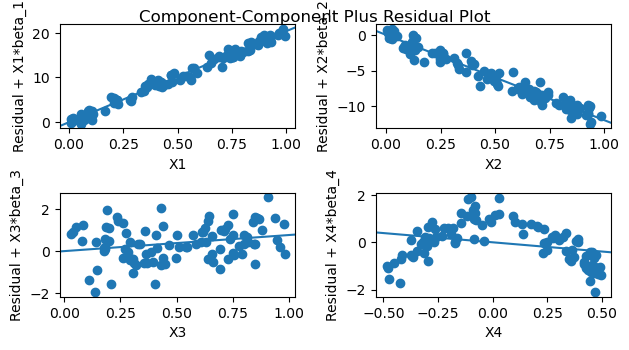

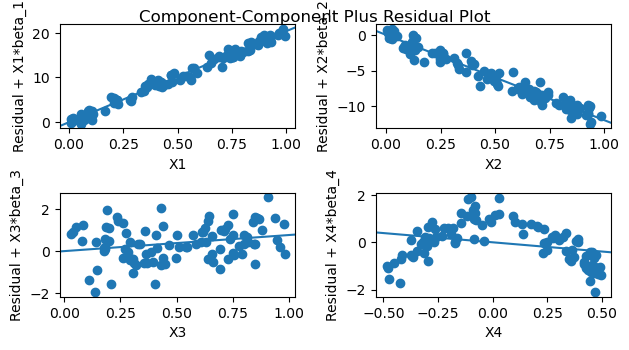

In [13]:
sm.graphics.plot_ccpr_grid(reg)

De manière évidente le graphique pour la variable `X4` ne montre pas
des points disposés le long d'une droite ou un nuage sans structure. 
Il montre une structuration de type \$x\mapsto x^2\$

## Amélioration du modèle 
Remplacer $X_4$ par $X_5=X_4^2$ dans le modèle précédent. Que pensez-vous de
  la nouvelle modélisation ? On pourra comparer ce modèle à celui de la
  question précédente.
\[`ols` de `smf`, méthode `fit` de la classe `OLS` et 
méthode `summary` pour l'instance/modèle ajusté\]
On pourra utiliser les
opérations et fonctions dans les formules
(voir https://www.statsmodels.org/stable/example_formulas.html)

In [15]:
reg2 = smf.ols("Y~X1+X2+X3+I(X4**2)", data=tp).fit()

## Analyser les résidus partiels
Analyser les résidus partiels du nouveau modèle et constater
qu'ils semblent corrects.
\[`plot_ccpr_grid` du sous module `sm.graphics`\], les résidus partiels sont
appelés "Component-Component plus Residual"
(CCPR) dans le module statsmodels…

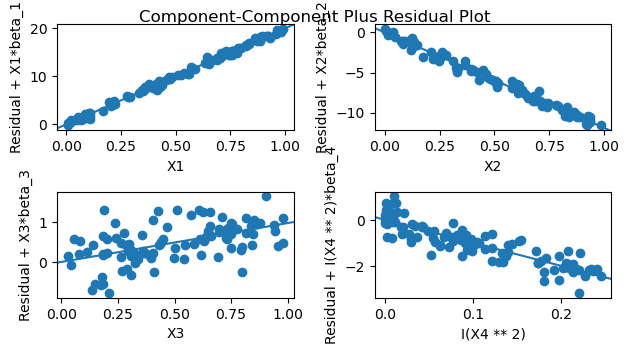

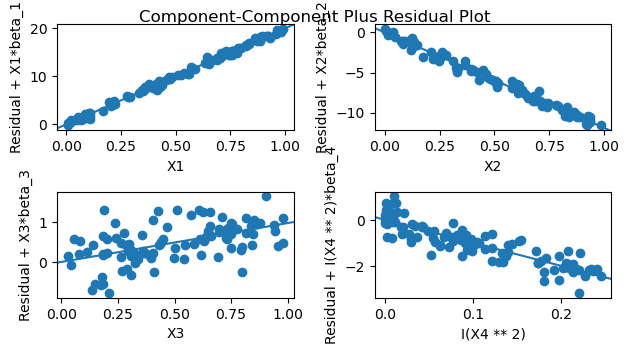

In [16]:
sm.graphics.plot_ccpr_grid(reg2)

The graphs show points with no obvious structure
or arranged along straight lines. The model would appear to be correct. We can compare 
compare them (same number of variables) by R2

In [17]:
reg.rsquared, reg2.rsquared

(0.9860422309885765, 0.9966109930897685)

et le R2 de la seconde modélisation apparait meilleur.

Faire le même travail pour `tp2bisrespartiel`.

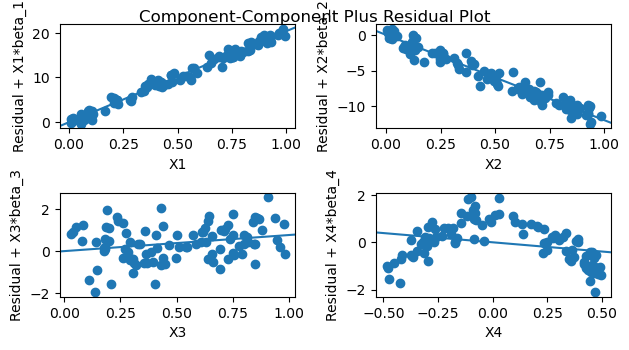

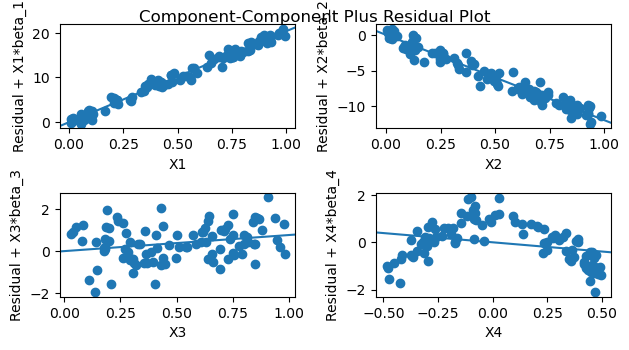

In [20]:
tp = pd.read_csv("data/tprespartiel.dta", header=0, sep=";")
tp.head()
reg = smf.ols("Y~X1+X2+X3+X4", data=tp).fit()
sm.graphics.plot_ccpr_grid(reg)

Nous voyons clairement une sinusoïde de type \$\sin(-2\pi X_4)\$ 
sur le dernier graphique. Changeons \$X_4\$

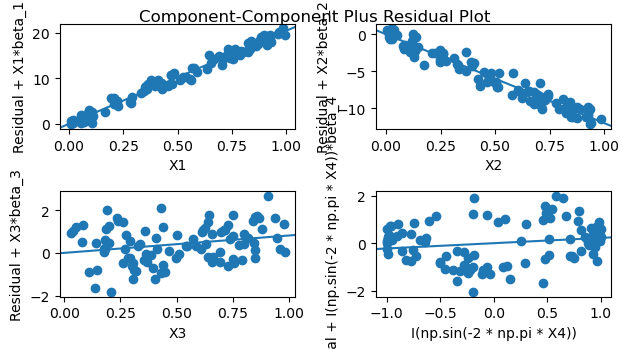

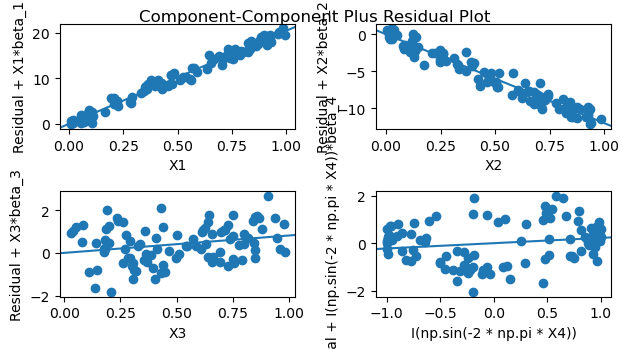

In [21]:
reg2 = smf.ols("Y~X1+X2+X3+I(np.sin(-2*np.pi*X4))", data=tp).fit()
sm.graphics.plot_ccpr_grid(reg2)

Là encore les graphiques deviennent corrects et nous pouvons comparer 
les R2 et constater que la seconde modélisation améliore le R2.

In [22]:
reg.rsqared

AttributeError: 'OLSResults' object has no attribute 'rsqared'

In [23]:
reg2.rsquared

0.985288660659536